### Relativistic degrees of freedom ($g^*_S$ and $g^*_R$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

#### Evaluation of $g^*_S$
<br> $g^*_S = \sum_i (\frac{T_i}{T})^3 \times \frac{45 g_i}{4 \pi^4} \int_0^\infty du \frac{u^2 \sqrt{u^2 + x_i^2}}{exp(\sqrt{u^2 + x_i^2}) + (-1)^{Q_i}} \times (1 + \frac{1}{3}\frac{u^2}{u^2 + x_i^2})$ </br>
<br> where $x_i = \frac{m_i}{T_i}$ </br>
<br> $Q_i = +1$ for bosons and $0$ for fermions </br>

<br> High temperature limit, </br>
<br> (A) for bosons, </br>
<br> $\int_0^\infty du \frac{u^2 \sqrt{u^2 + x_i^2}}{exp(\sqrt{u^2 + x_i^2}) - 1} \times (1 + \frac{1}{3}\frac{u^2}{u^2 + x_i^2}) \rightarrow \frac{4 \pi^4}{45}$ </br>
<br> $g^*_{S, bosons} = \sum_{i \in bosons} g_i (\frac{T_i}{T})^3$ </br>

<br> (A) for fermions, </br>
<br> $\int_0^\infty du \frac{u^2 \sqrt{u^2 + x_i^2}}{exp(\sqrt{u^2 + x_i^2}) + 1} \times (1 + \frac{1}{3}\frac{u^2}{u^2 + x_i^2}) \rightarrow \frac{7}{8} \times \frac{4 \pi^4}{45}$ </br>
<br> $g^*_{S, fermions} = \sum_{i \in fermions} g_i (\frac{T_i}{T})^3 \times \frac{7}{8}$ </br>

#### Finally, $g^*_S$
<br> $g^*_{S, total} = \sum_{i \in bosons} g_i (\frac{T_i}{T})^3 + \frac{7}{8} \times\sum_{i \in fermions} g_i (\frac{T_i}{T})^3$ </br>

Total g_i = 118
Bosonic dof = 28
Fermionic dof = 90
Effective # of relativistic dof = 106.75
g*_max(T) = 106.74999995088137 and g*_min(T) = 9.727272726526635


/var/folders/t2/lstqgfyn6q5_xtsg6k8dtgz40000gn/T/ipykernel_34004/63433812.py:65: RuntimeWarning: overflow encountered in exp
  return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) + 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))
/var/folders/t2/lstqgfyn6q5_xtsg6k8dtgz40000gn/T/ipykernel_34004/63433812.py:63: RuntimeWarning: overflow encountered in exp
  return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) - 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))
/var/folders/t2/lstqgfyn6q5_xtsg6k8dtgz40000gn/T/ipykernel_34004/63433812.py:96: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 150)


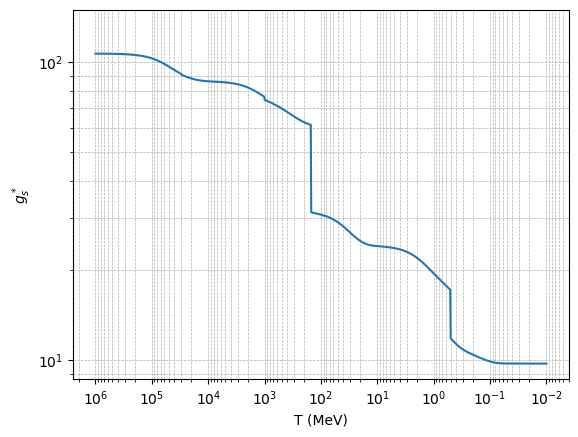

In [2]:
KtoeV = 1/11606
T_QCD = 150 * 1e6 ## eV

T_CMB = lambda T: T
T_neutrino = lambda T: ((4/11)**(1/3)) * T

## SM particles dictionary
particles = {
   'top': {'m_i': 173*1.e9, 'T_i': 30*1.e9, 'g_i': 12, 'is_boson': False},  # in eV
   'bottom': {'m_i': 4*1.e9, 'T_i': 1*1.e9, 'g_i': 12, 'is_boson': False},
   'charm': {'m_i': 1*1.e9, 'T_i': T_QCD, 'g_i': 12, 'is_boson': False},
   'strange': {'m_i': 100*1.e6, 'T_i': T_QCD, 'g_i': 12, 'is_boson': False},
   'down': {'m_i': 5*1.e6, 'T_i': T_QCD, 'g_i': 12, 'is_boson': False},
   'up': {'m_i': 2*1.e6, 'T_i': T_QCD, 'g_i': 12, 'is_boson': False},
   'gluon': {'m_i': 0, 'T_i': T_QCD, 'g_i': 16, 'is_boson': True},
   'tau': {'m_i': 1777*1.e6, 'T_i': T_QCD, 'g_i': 4, 'is_boson': False},
   'mu': {'m_i': 106*1.e6, 'T_i': 1.e7, 'g_i': 4, 'is_boson': False},
   'electron': {'m_i': 511*1.e3, 'T_i': 5.e5, 'g_i': 4, 'is_boson': False},
   'tau_neutrino': {'m_i': 0.6, 'T_i': 5e5, 'g_i': 2, 'is_boson': False}, #T_i': lambda T: T_neutrino(T)
   'mu_neutrino': {'m_i': 0.6, 'T_i': 5e5, 'g_i': 2, 'is_boson': False},
   'e_neutrino': {'m_i': 0.6, 'T_i': 5e5, 'g_i': 2, 'is_boson': False},
   'W+': {'m_i': 80*1.e9, 'T_i': 10*1.e9, 'g_i': 3, 'is_boson': True},
   'W-': {'m_i': 80*1.e9, 'T_i': 10*1.e9, 'g_i': 3, 'is_boson': True},
   'Z0': {'m_i': 91*1.e9, 'T_i': 10*1.e9, 'g_i': 3, 'is_boson': True},
   #'photon': {'m_i': 0, 'T_i': lambda T: T, 'g_i': 2, 'is_boson': True},
   'photon': {'m_i': 0, 'T_i': 0.2, 'g_i': 2, 'is_boson': True},
   'higgs': {'m_i': 125*1.e9, 'T_i': 10*1.e9, 'g_i': 1, 'is_boson': True}
}

#### relativistic degrees of freedom 
g_iSum = 0
g_iBoson = 0
g_iFermion = 0
for particle, data in particles.items():
    g_i = data['g_i']
    is_boson = data['is_boson']
    g_iSum += g_i
    if is_boson:
        g_iBoson += g_i
    else:
        g_iFermion += g_i

print(rf'Total g_i = {g_iSum}')
print(rf'Bosonic dof = {g_iBoson}')
print(rf'Fermionic dof = {g_iFermion}')
print(rf'Effective # of relativistic dof = {g_iBoson + (7/8)*g_iFermion}')
#########################
#########################

def g_starS(T, particles):
    total_sum = 0
    for particle, data in particles.items():
        m_i = data['m_i']
        T_i = data['T_i']
        #T_i = data['T_i'](T) if callable(data['T_i']) else data['T_i']
        g_i = data['g_i']
        is_boson = data['is_boson']
        
        # Decoupling of the relativistic particles
        
        def integrand(u):
            if is_boson:
                return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) - 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))
            else:
                return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) + 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))
            
        if T > T_i:
            x_i = m_i / T
            factor = (45 * g_i) / (4 * np.pi**4)
            integral, _ = quad(integrand, 0, np.inf)
            result = factor * integral
        else:
            x_i = m_i / T
            factor = (45 * g_i) / (4 * np.pi**4) * (4/11) #(T_i / T)**3
            integral, _ = quad(integrand, 0, np.inf)
            result = factor * integral
        
        total_sum += result
    return total_sum

g_min = g_starS(1.e4, particles)
g_max = g_starS(1.e15, particles)
print('==============')
print(f'g*_max(T) = {g_max} and g*_min(T) = {g_min}')

## plotting
#T_list = np.linspace(1e4, 1e12, 100)
T_list = np.logspace(4, 12, 1000)
g_list = [g_starS(T_i, particles) for T_i in T_list]
plt.plot(T_list/1e6, g_list, '-')
plt.xlabel(r'T (MeV)')
plt.ylabel(r'$g^*_{s}$')
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1.e0, 150)
plt.ylim(0, 150)
plt.gca().invert_xaxis()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#### $g^*_S$ and $g^*_R$ (both)

Total g_i = 118
Bosonic dof = 28
Fermionic dof = 90
Effective # of relativistic dof = 106.75
g*S_max(T) = 106.74999995088137 and g*S_min(T) = 9.727272726526635
g*R_max(T) = 106.74999996725424 and g*R_min(T) = 7.515463428536496


/var/folders/t2/lstqgfyn6q5_xtsg6k8dtgz40000gn/T/ipykernel_34004/472313097.py:59: RuntimeWarning: overflow encountered in exp
  return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) + 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))
/var/folders/t2/lstqgfyn6q5_xtsg6k8dtgz40000gn/T/ipykernel_34004/472313097.py:57: RuntimeWarning: overflow encountered in exp
  return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) - 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))
/var/folders/t2/lstqgfyn6q5_xtsg6k8dtgz40000gn/T/ipykernel_34004/472313097.py:92: RuntimeWarning: overflow encountered in exp
  return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) + 1))
/var/folders/t2/lstqgfyn6q5_xtsg6k8dtgz40000gn/T/ipykernel_34004/472313097.py:90: RuntimeWarning: overflow encountered in exp
  return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) - 1))
/var/folders/t2/lstqgfyn6q5_xtsg6k8dtgz40000gn/T/ipykernel_34004/472313097.py:127: UserWarning: At

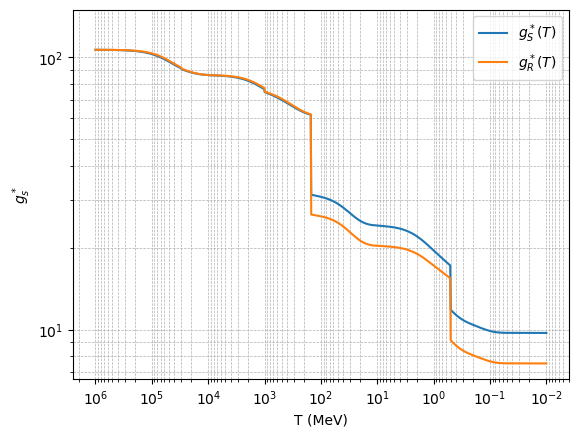

In [10]:
## SM particles dictionary (sonmething wrong)
particles = {
   'top': {'m_i': 173*1.e9, 'T_i': 30*1.e9, 'g_i': 12, 'is_boson': False},  # in eV
   'bottom': {'m_i': 4*1.e9, 'T_i': 1*1.e9, 'g_i': 12, 'is_boson': False},
   'charm': {'m_i': 1*1.e9, 'T_i': T_QCD, 'g_i': 12, 'is_boson': False},
   'strange': {'m_i': 100*1.e6, 'T_i': T_QCD, 'g_i': 12, 'is_boson': False},
   'down': {'m_i': 5*1.e6, 'T_i': T_QCD, 'g_i': 12, 'is_boson': False},
   'up': {'m_i': 2*1.e6, 'T_i': T_QCD, 'g_i': 12, 'is_boson': False},
   'gluon': {'m_i': 0, 'T_i': T_QCD, 'g_i': 16, 'is_boson': True},
   'tau': {'m_i': 1777*1.e6, 'T_i': T_QCD, 'g_i': 4, 'is_boson': False},
   'mu': {'m_i': 106*1.e6, 'T_i': 1.e7, 'g_i': 4, 'is_boson': False},
   'electron': {'m_i': 511*1.e3, 'T_i': 5.e5, 'g_i': 4, 'is_boson': False},
   'tau_neutrino': {'m_i': 0.6, 'T_i': 5e5, 'g_i': 2, 'is_boson': False}, #T_i': lambda T: T_neutrino(T)
   'mu_neutrino': {'m_i': 0.6, 'T_i': 5e5, 'g_i': 2, 'is_boson': False},
   'e_neutrino': {'m_i': 0.6, 'T_i': 5e5, 'g_i': 2, 'is_boson': False},
   'W+': {'m_i': 80*1.e9, 'T_i': 10*1.e9, 'g_i': 3, 'is_boson': True},
   'W-': {'m_i': 80*1.e9, 'T_i': 10*1.e9, 'g_i': 3, 'is_boson': True},
   'Z0': {'m_i': 91*1.e9, 'T_i': 10*1.e9, 'g_i': 3, 'is_boson': True},
   #'photon': {'m_i': 0, 'T_i': lambda T: T, 'g_i': 2, 'is_boson': True},
   'photon': {'m_i': 0, 'T_i': 0.2, 'g_i': 2, 'is_boson': True},
   'higgs': {'m_i': 125*1.e9, 'T_i': 10*1.e9, 'g_i': 1, 'is_boson': True}
}

#### relativistic degrees of freedom 
g_iSum = 0
g_iBoson = 0
g_iFermion = 0
for particle, data in particles.items():
    g_i = data['g_i']
    is_boson = data['is_boson']
    g_iSum += g_i
    if is_boson:
        g_iBoson += g_i
    else:
        g_iFermion += g_i

print(rf'Total g_i = {g_iSum}')
print(rf'Bosonic dof = {g_iBoson}')
print(rf'Fermionic dof = {g_iFermion}')
print(rf'Effective # of relativistic dof = {g_iBoson + (7/8)*g_iFermion}')
#########################
#########################

def g_starS(T, particles):
    total_sum = 0
    for particle, data in particles.items():
        m_i = data['m_i']
        T_i = data['T_i']
        #T_i = data['T_i'](T) if callable(data['T_i']) else data['T_i']
        g_i = data['g_i']
        is_boson = data['is_boson']
        
        # Decoupling of the relativistic particles

        def integrand(u):
            if is_boson:
                return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) - 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))
            else:
                return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) + 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))
            
        if T > T_i:
            x_i = m_i / T
            factor = (45 * g_i) / (4 * np.pi**4)
            integral, _ = quad(integrand, 0, np.inf)
            result = factor * integral
        else:
            x_i = m_i / T
            factor = (45 * g_i) / (4 * np.pi**4) * (4/11) #(T_i / T)**3
            integral, _ = quad(integrand, 0, np.inf)
            result = factor * integral

        total_sum += result
    return total_sum

def g_starR(T, particles):
    total_sum = 0
    for particle, data in particles.items():
        m_i = data['m_i']
        T_i = data['T_i']
        #T_i = data['T_i'](T) if callable(data['T_i']) else data['T_i']
        g_i = data['g_i']
        is_boson = data['is_boson']
        
        # Decoupling of the relativistic particles
        #x_i = m_i / T
        #factor = (45 * g_i) / (4 * np.pi**4)

        def integrand(u):
            if is_boson:
                return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) - 1))
            else:
                return (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) + 1))
            
        if T > T_i:
            x_i = m_i / T
            factor = (15 * g_i) / (np.pi**4)
            integral, _ = quad(integrand, 0, np.inf)
            result = factor * integral
        else:
            x_i = m_i / T
            factor = (15 * g_i) / (np.pi**4) * (4/11)**(4/3) #(T_i / T)**4
            integral, _ = quad(integrand, 0, np.inf)
            result = factor * integral
        total_sum += result
    return total_sum

gS_min = g_starS(1.e4, particles)
gS_max = g_starS(1.e15, particles)
gR_min = g_starR(1.e4, particles)
gR_max = g_starR(1.e15, particles)
print('==============')
print(f'g*S_max(T) = {gS_max} and g*S_min(T) = {gS_min}')
print(f'g*R_max(T) = {gR_max} and g*R_min(T) = {gR_min}')

## plotting
#T_list = np.linspace(1e4, 1e12, 100)
T_list = np.logspace(4, 12, 1000)
gS_list = [g_starS(T_i, particles) for T_i in T_list]
gR_list = [g_starR(T_i, particles) for T_i in T_list]
plt.plot(T_list/1e6, gS_list, '-', label=r'$g^*_S(T)$') ## in MeV
plt.plot(T_list/1e6, gR_list, '-', label=r'$g^*_R(T)$')
plt.xlabel(r'T (MeV)')
plt.ylabel(r'$g^*_{s}$')
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1.e0, 150)
plt.ylim(0, 150)
plt.legend()
plt.gca().invert_xaxis()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#### Some checks
<br> At high temperature, $x_i \rightarrow 0$ </br>
<br> $g_* = g_{bosons} + \frac{7}{8} g_{fermions}$ </br>
<br> bosonI $\rightarrow 1$</br>
<br> fermionI $\rightarrow \frac{7}{8}$</br>

0.9999998100678351
0.874999905011399
0.875


/var/folders/t2/lstqgfyn6q5_xtsg6k8dtgz40000gn/T/ipykernel_34004/2389321930.py:4: RuntimeWarning: overflow encountered in exp
  I1 = lambda u: (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) - 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))
/var/folders/t2/lstqgfyn6q5_xtsg6k8dtgz40000gn/T/ipykernel_34004/2389321930.py:10: RuntimeWarning: overflow encountered in exp
  I2 = lambda u: (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) + 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))


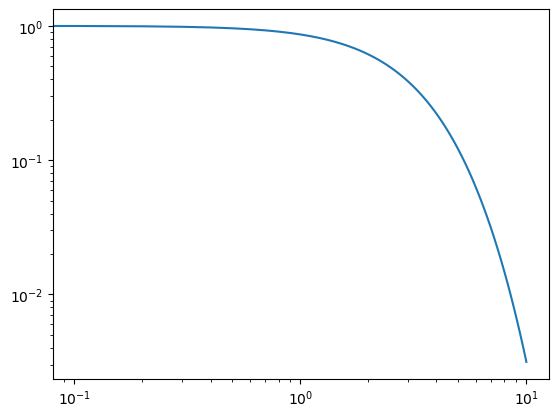

In [11]:
## Behaviour of the integral
def bosonI(x_i):
    #x_i = 0 --> High Temperature limit
    I1 = lambda u: (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) - 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))
    I1_, _ = quad(lambda u: I1(u), 0, np.inf)
    return I1_*(45/(4*np.pi**4))

def fermionI(x_i):
    #x_i = 0 --> High Temperature limit
    I2 = lambda u: (u**2 * np.sqrt(u**2 + x_i**2) / (np.exp(np.sqrt(u**2 + x_i**2)) + 1)) * (1 + (1/3) * u**2 / (u**2 + x_i**2))
    I2_, _ = quad(lambda u: I2(u), 0, np.inf)
    return I2_*(45/(4*np.pi**4))

## checks
print(bosonI(0.001))
print(fermionI(0.001))
print(7/8)
#print((4*np.pi**4)/45)

xi_list = np.linspace(0, 10, 100)
gfermi_list = [bosonI(xi_) for xi_ in xi_list]
plt.plot(xi_list, gfermi_list, '-')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### Approximate fit for $g^*_s(T)$

106.24624173002539
3.8961949908533433


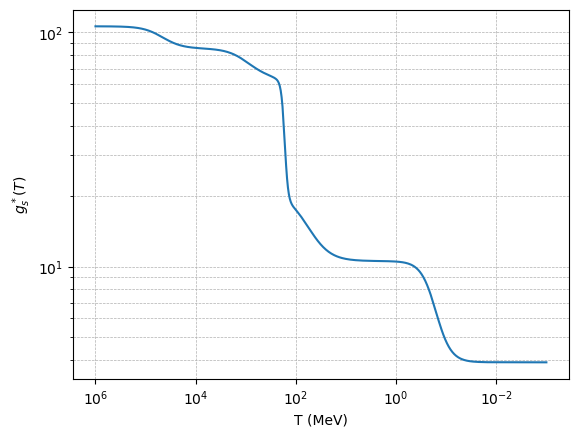

In [12]:
## Approximate fit for g*_S
aS_0 = 1.36
aS_1 = [0.498, 0.327, 0.579, 0.140, 0.109]
aS_2 = [-8.74, -2.89, -1.79, -0.102, 3.82]
aS_3 = [0.693, 1.01, 0.155, 0.963, 0.907]

def g_starS(T):
    sum = 0
    for i in range(5):
        term = aS_1[i] * (1 + np.tanh((np.log(T) - aS_2[i]) / aS_3[i])) ## log(T) where T is in GeV
        sum += term
    return np.exp(aS_0 + sum)

#T_list = np.linspace(1.e-6, 5.e2, 500) ## in GeV
T_list = np.logspace(-6, 3, 500) ## in GeV
g_starS_list = [g_starS(T_) for T_ in T_list]
print(max(g_starS_list))
print(min(g_starS_list))
plt.plot(T_list*1.e3, g_starS_list, '-') ## converting to MeV
plt.xlabel('T (MeV)')
plt.ylabel(r'$g^*_{s}(T)$')
plt.xscale('log')
plt.yscale('log')
#plt.xlim(min(T_list), max(T_list))
#plt.ylim(min(g_starS_list), max(g_starS_list))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().invert_xaxis()
plt.show()

#### $g^*_S$ and $g^*_R$ approximate fit from Wantz et. al. [arXiv: 0910.1066]

106.24624173002539
3.8961949908533433


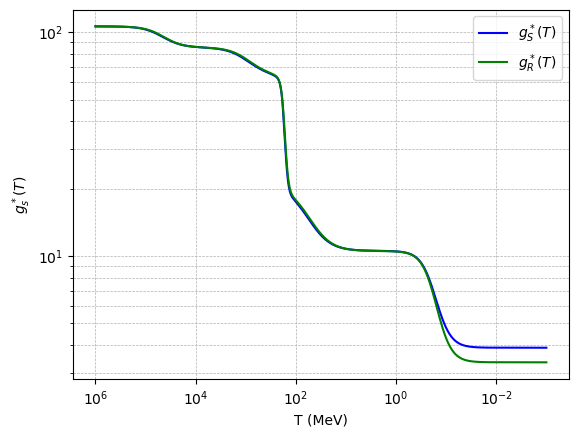

In [13]:
## Approximate fit for g*_S
aS_0 = 1.36
aS_1 = [0.498, 0.327, 0.579, 0.140, 0.109]
aS_2 = [-8.74, -2.89, -1.79, -0.102, 3.82]
aS_3 = [0.693, 1.01, 0.155, 0.963, 0.907]

aR_0 = 1.21
aR_1 = [0.572, 0.330, 0.579, 0.138, 0.108]
aR_2 = [-8.77, -2.95, -1.80, -0.162, 3.76]
aR_3 = [0.682, 1.01, 0.165, 0.934, 0.869]

def g_starS(T):
    sum = 0
    for i in range(5):
        term = aS_1[i] * (1 + np.tanh((np.log(T) - aS_2[i]) / aS_3[i])) ## log(T) where T is in GeV
        sum += term
    return np.exp(aS_0 + sum)

def g_starR(T):
    sum = 0
    for i in range(5):
        term = aR_1[i] * (1 + np.tanh((np.log(T) - aR_2[i]) / aR_3[i])) ## log(T) where T is in GeV
        sum += term
    return np.exp(aR_0 + sum)

#T_list = np.linspace(1.e-6, 5.e2, 500) ## in GeV
T_list = np.logspace(-6, 3, 500) ## in GeV
g_starS_list = [g_starS(T_) for T_ in T_list]
g_starR_list = [g_starR(T_) for T_ in T_list]
print(max(g_starS_list))
print(min(g_starS_list))
plt.plot(T_list*1.e3, g_starS_list, '-', color='blue', label=r'$g^*_S(T)$') ## converting to MeV
plt.plot(T_list*1.e3, g_starR_list, '-', color='green', label=r'$g^*_R(T)$')
plt.xlabel('T (MeV)')
plt.ylabel(r'$g^*_{s}(T)$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
#plt.xlim(min(T_list), max(T_list))
#plt.ylim(min(g_starS_list), max(g_starS_list))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().invert_xaxis()
plt.show()